In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mental_df = pd.read_csv('mental-health.csv')
mental_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
mental_df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [6]:
mental_df["state"].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [9]:
mental_df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [10]:
mental_df = mental_df.drop(["Timestamp", 'Country', 'state', 'comments'], axis=1)
mental_df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [11]:
mental_df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [12]:
mental_df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [18]:
def fix_invalid_age(age):
    if age < 0 or age > 100:
        age = mental_df["Age"].median()
    return age

In [21]:
mental_df["Age"] = mental_df["Age"].apply(fix_invalid_age)

In [22]:
mental_df["Age"].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., 43., 56., 60., 54., 55., 48., 20., 57., 58., 47., 62.,
       51., 65., 49.,  5., 53., 61.,  8., 11., 72.])

In [24]:
mental_df["Gender"] = mental_df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male')

mental_df["Gender"] = mental_df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female')
mental_df["Gender"] = mental_df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other')

In [25]:
mental_df["Gender"].value_counts()

Gender
Male      991
Female    247
Other      21
Name: count, dtype: int64

In [37]:
mental_df["self_employed"] = mental_df["self_employed"].fillna(mental_df["self_employed"].mode()[0])

In [42]:
mental_df["work_interfere"] = mental_df["work_interfere"].fillna(mental_df["work_interfere"].mode()[0])

In [45]:
mental_df["no_employees"].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

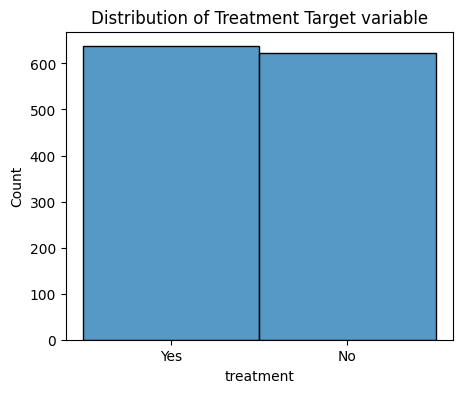

In [56]:
plt.figure(figsize = (5, 4))
sns.histplot(mental_df["treatment"])
plt.title("Distribution of Treatment Target variable")
plt.show()

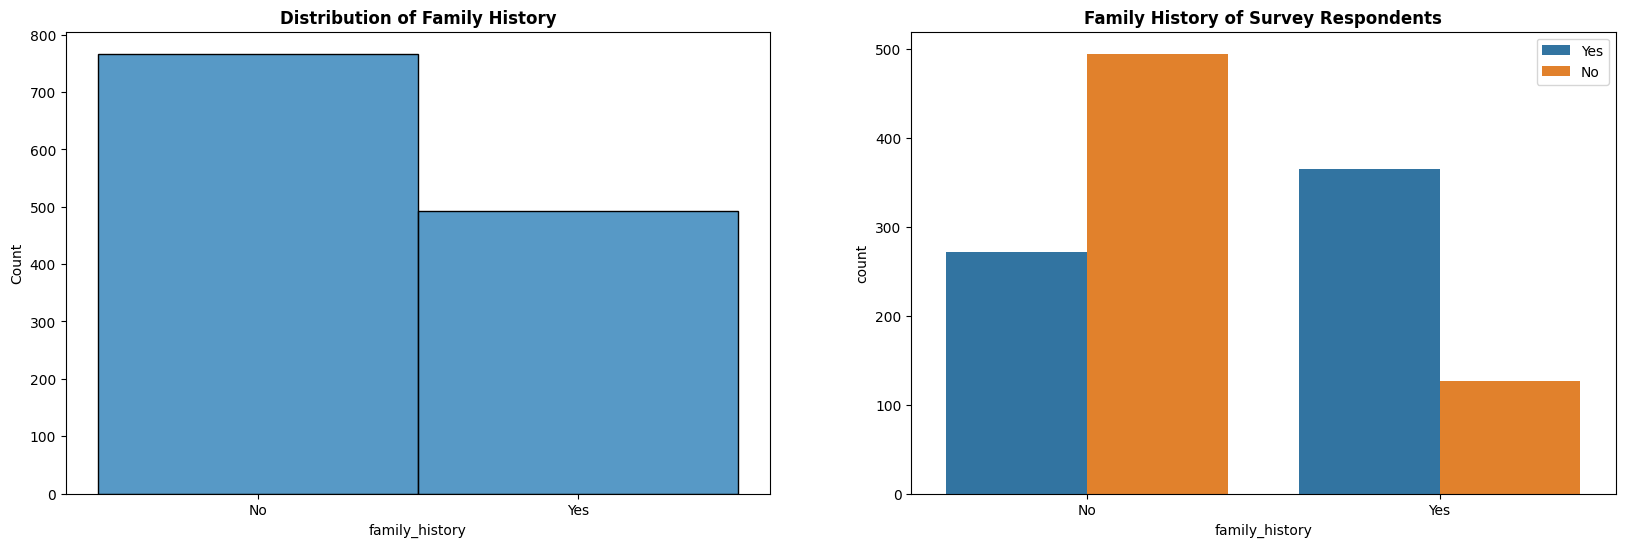

In [63]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(mental_df["family_history"])
plt.title("Distribution of Family History", fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(x='family_history', hue='treatment', data=mental_df)
plt.title('Family History of Survey Respondents', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

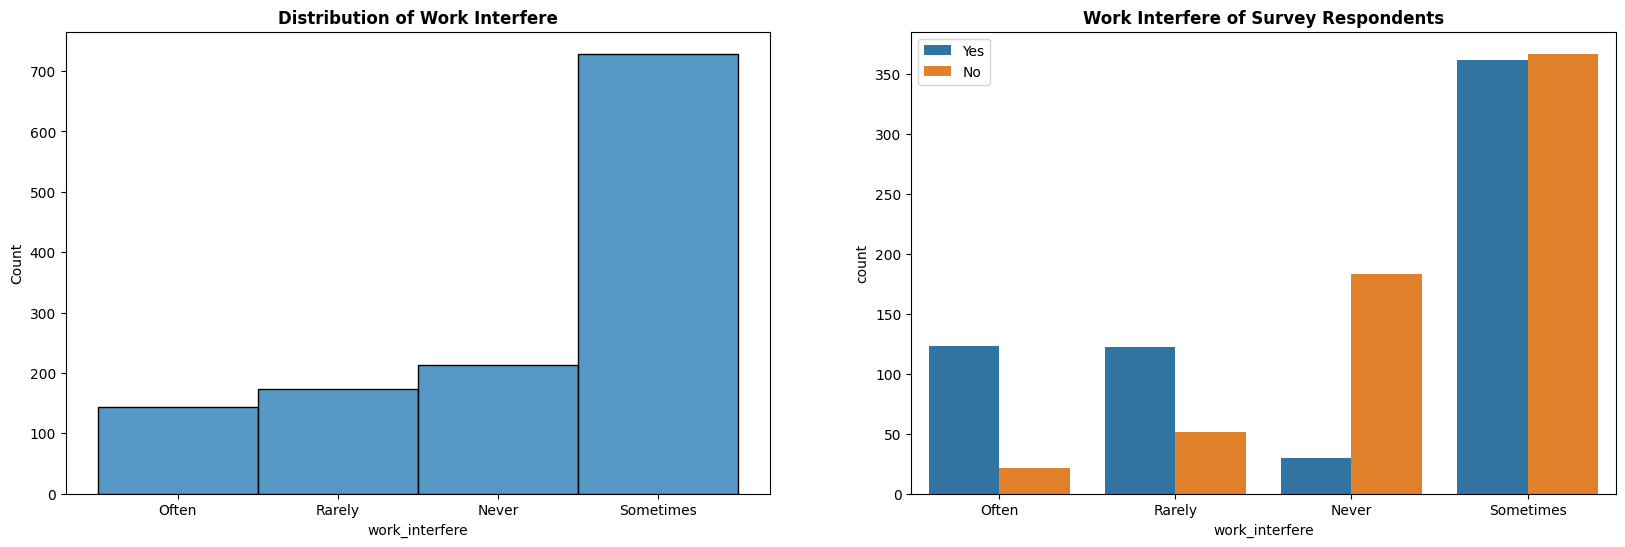

In [61]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(mental_df["work_interfere"])
plt.title("Distribution of Work Interfere", fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(x='work_interfere', hue='treatment', data=mental_df)
plt.title('Work Interfere of Survey Respondents', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()